### Utilisation du k-NN comme classifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importations
data = pd.read_csv('./data/flowers_dataset.csv')

### Normalisation && Categorisation

In [3]:
# Separation
X = data[["largeur_petale_cm", "longueur_petale_cm", "couleur_dominante", "largeur_feuille_cm", "longueur_tige_cm", "parfum_intensite"]]
y = data["espece"]

enc_col = pd.get_dummies(X, columns=["couleur_dominante"], prefix="couleur", dtype=int)

X.drop(columns=["couleur_dominante"], inplace=True)
enc_col = enc_col.drop(X.columns, axis=1)

# normalisation des donnees
mean = X.mean()
std = X.std()

X = (X - mean) / std
X = pd.concat([X, enc_col], axis=1)

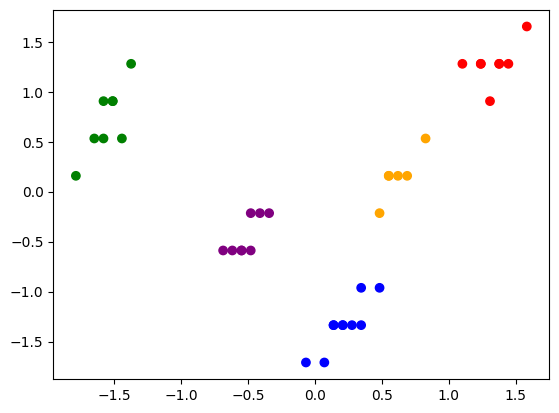

In [6]:
# Visualisation des donnees normalisees
import matplotlib.pyplot as plt

plt.scatter(X["longueur_petale_cm"], X["parfum_intensite"], c=y.map({'Rose de Cristal':'red', 'Iris d\'Or':'blue', 'Lys de Nuit':'green', 'Orchidée de Brume':'orange', 'Tulipe de Feu':'purple'}))

### Separation des donnees

In [4]:
# function pour le split
def train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True):
    n = len(X)
    indices =np.arange(n)

    if random_state is not None:
        np.random.seed(random_state)

    # mellange des donnees
    if shuffle:
        np.random.shuffle(indices)

    # separateur
    split = int(n * (1 - test_size))

    train_idx = indices[:split]
    test_idx = indices[split:]

    return X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Prediction

In [6]:
def predict(X, k):
    X_pred = np.array(X)
    y_pred = []

    for line in X_pred:
        dist = np.sqrt(np.sum((X_train - line) ** 2, axis=1))
        k_indices = np.argsort(dist)[:k]
        k_nearest_labels = y_train.iloc[k_indices]
        most_common = k_nearest_labels.mode()[0]
        y_pred.append(most_common)
    return y_pred

In [7]:
predictions = predict(X_test, k=5)

In [11]:
# calcul de l'accuracy
def accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(y_true == y_pred) / len(y_true)

In [12]:
acc = accuracy(y_test, predictions)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 100.00%
